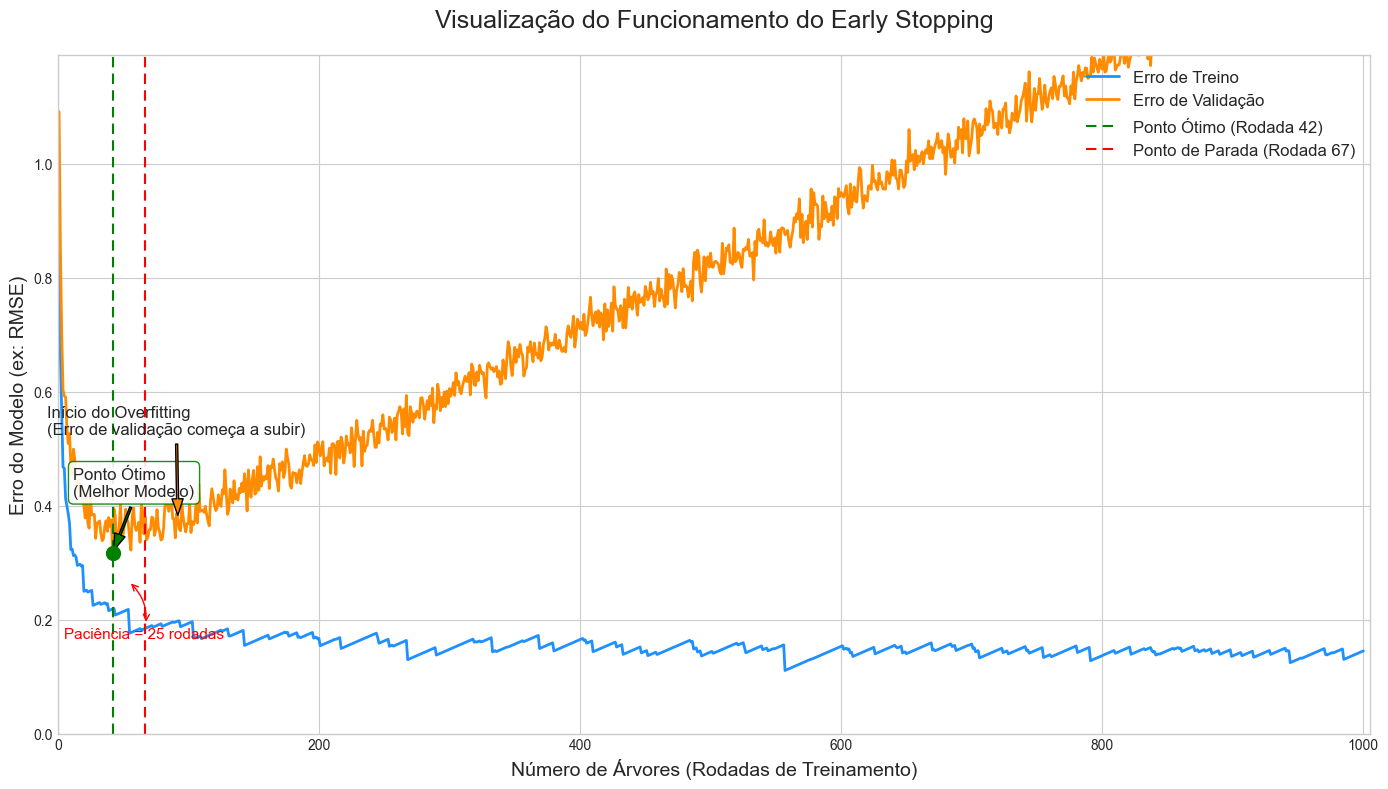

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style

# Define um estilo visual agradável para o gráfico
style.use('seaborn-v0_8-whitegrid')

# --- 1. Geração de Dados Sintéticos ---
# Criamos dados que simulam o comportamento típico das curvas de erro.

# Eixo X: Número de rodadas de treinamento (árvores)
n_rounds = 1000
rounds = np.arange(1, n_rounds + 1)

# Eixo Y: Erro de Treino (geralmente sempre diminui)
# Usamos uma função de decaimento com um pouco de ruído aleatório.
noise_train = np.random.normal(0, 0.015, n_rounds)
train_error = 0.8 / (rounds**0.6) + 0.15 + noise_train
# Garante que o erro não seja negativo e que tenha uma tendência de queda
train_error = np.maximum(train_error, 0.1)
for i in range(1, n_rounds):
    train_error[i] = min(train_error[i], train_error[i-1] + 0.001)


# Eixo Y: Erro de Validação (diminui e depois sobe, indicando overfitting)
# Usamos uma combinação de decaimento e um termo linear para fazê-lo subir.
noise_val = np.random.normal(0, 0.02, n_rounds)
validation_error = 0.9 / (rounds**0.5) + 0.0012 * rounds + 0.18 + noise_val


# --- 2. Encontrando os Pontos-Chave para Anotação ---

# Encontra o ponto ótimo (a rodada com o menor erro de validação)
optimal_round_idx = np.argmin(validation_error)
optimal_round = rounds[optimal_round_idx]
min_validation_error = validation_error[optimal_round_idx]

# Simula o 'early_stopping_rounds' (paciência)
patience = 25
stop_round = optimal_round + patience
# Garante que o ponto de parada não exceda o número total de rodadas
stop_round = min(stop_round, n_rounds)


# --- 3. Geração do Gráfico ---

plt.figure(figsize=(14, 8))

# Plota as duas curvas de erro
plt.plot(rounds, train_error, label='Erro de Treino', color='dodgerblue', linewidth=2)
plt.plot(rounds, validation_error, label='Erro de Validação', color='darkorange', linewidth=2)

# Adiciona linhas verticais e anotações para destacar os pontos importantes
plt.axvline(x=optimal_round, color='green', linestyle='--', dashes=(5, 3), label=f'Ponto Ótimo (Rodada {optimal_round})')
plt.axvline(x=stop_round, color='red', linestyle='--', dashes=(5, 3), label=f'Ponto de Parada (Rodada {stop_round})')

# Marca o ponto ótimo com um ponto verde
plt.scatter(optimal_round, min_validation_error, color='green', s=100, zorder=5)

# Anotações no gráfico para explicar o que está acontecendo
plt.annotate(
    'Ponto Ótimo\n(Melhor Modelo)',
    xy=(optimal_round, min_validation_error),
    xytext=(optimal_round - 30, min_validation_error + 0.1),
    arrowprops=dict(facecolor='green', shrink=0.05, width=1.5, headwidth=8),
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="green", lw=1, alpha=0.9)
)

plt.annotate(
    'Início do Overfitting\n(Erro de validação começa a subir)',
    xy=(optimal_round + 50, validation_error[optimal_round_idx + 50]),
    xytext=(optimal_round - 50, validation_error[optimal_round_idx + 50] + 0.15),
    arrowprops=dict(facecolor='darkorange', shrink=0.05, width=1.5, headwidth=8),
    fontsize=12
)

plt.annotate(
    f'Paciência = {patience} rodadas',
    xy=(optimal_round + patience/2, min_validation_error - 0.05),
    xytext=(optimal_round + patience/2 - 50, min_validation_error - 0.15),
    arrowprops=dict(arrowstyle="<->", connectionstyle="arc3,rad=0.3", ec='red'),
    fontsize=11,
    color='red'
)


# Configurações finais do gráfico
plt.title('Visualização do Funcionamento do Early Stopping', fontsize=18, pad=20)
plt.xlabel('Número de Árvores (Rodadas de Treinamento)', fontsize=14)
plt.ylabel('Erro do Modelo (ex: RMSE)', fontsize=14)
plt.legend(fontsize=12, loc='upper right')
plt.ylim(0, max(validation_error[0], train_error[0]) + 0.1) # Ajusta o limite do eixo Y
plt.xlim(0, n_rounds + 5) # Ajusta o limite do eixo X
plt.tight_layout()

# Exibe o gráfico
plt.show()